<a href="https://colab.research.google.com/github/XingxinHE/FinalThesis_DL-GA/blob/master/Stage_3_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Mounted at /content/gdrive


In [3]:
os.chdir("/content/gdrive/My Drive/Final Thesis/data/stage3")

## Data Preparation

In [10]:
train_x = pd.read_csv('605_coord.csv', index_col=0)
train_x.drop(columns=list('2568'), axis=1, inplace=True)

In [11]:
train_x.shape

(605, 5)

In [12]:
train_x = train_x.iloc[:79, :]
train_x.shape

(79, 5)

### Normalize train_x

In [13]:
def norm(x):
  return (x - x.describe().transpose()['mean']) / x.describe().transpose()['std']

In [14]:
train_x = norm(train_x)
train_x.head()

,0,1,3,4,7
0,1.498629,-0.108128,0.466858,1.088867,1.215449
1,1.498629,1.112170,1.388902,-0.042982,1.215449
2,0.469136,-1.328425,1.388902,1.088867,-1.035031
3,-1.589850,1.112170,1.388902,1.088867,-0.284871
4,0.983882,1.112170,0.466858,-1.174830,0.465289


In [15]:
train_y = pd.read_csv('optimal_79.csv', index_col=0)
train_y.shape

(79, 2)

In [16]:
train_y.head()

,bar_orders,weight
0,"2.83810870599491, 0.6358100457084843, 1.591918...",103.451705
1,"0.8345770523120521, 0.9756589343833298, 2.6056...",111.959005
2,"2.957788117293222, 2.724991772207066, 1.764825...",119.747432
3,"3.438750738336929, 0.0004908677138951938, 1.38...",101.092659
4,"0.2559104201266245, 1.5397079930733486, 1.6019...",111.386501


## Prepare Input and Output

In [17]:
#define a function convert np of object to np of float
def f(x):
    return np.array(x.replace('[', '').replace(']', '').replace(',', ' ').split()).astype(float)

In [18]:
train_y = np.array([f(t) for t in train_y['bar_orders']])
train_y = np.floor(train_y)
train_y = train_y.astype(int)
train_y.shape

(79, 220)

In [19]:
train_y

array([[2, 0, 1, ..., 0, 2, 1],
       [0, 0, 2, ..., 2, 0, 1],
       [2, 2, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [3, 0, 0, ..., 1, 0, 1],
       [0, 1, 2, ..., 2, 3, 0]])

## Initialize Model

In [73]:
input_tensor = Input(shape=(5,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(220, activation='relu')(input_tensor)

### Iniitiane model

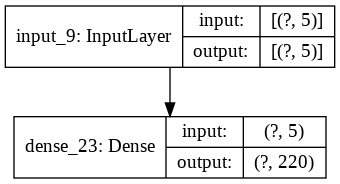

In [74]:
model = keras.Model(
    input_tensor,
    output_tensor
)

keras.utils.plot_model(model, "stage_3_algorithm.png", show_shapes=True)

In [77]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss='categorical_crossentropy'
)

In [30]:
train_x = train_x.to_numpy()

In [79]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(
    train_x,
    train_y,
    epochs=2000,
    batch_size=8
)

Epoch 1/2000
10/10 [==============================] - 0s 2ms/step - loss: 2550.0212
Epoch 2/2000
10/10 [==============================] - 0s 2ms/step - loss: 2529.5425
Epoch 3/2000
10/10 [==============================] - 0s 2ms/step - loss: 2514.3091
Epoch 4/2000
10/10 [==============================] - 0s 2ms/step - loss: 2498.1121
Epoch 5/2000
10/10 [==============================] - 0s 2ms/step - loss: 2479.0078
Epoch 6/2000
10/10 [==============================] - 0s 2ms/step - loss: 2462.1289
Epoch 7/2000
10/10 [==============================] - 0s 2ms/step - loss: 2443.0854
Epoch 8/2000
10/10 [==============================] - 0s 2ms/step - loss: 2426.2871
Epoch 9/2000
10/10 [==============================] - 0s 2ms/step - loss: 2404.5046
Epoch 10/2000
10/10 [==============================] - 0s 2ms/step - loss: 2383.5762
Epoch 11/2000
10/10 [==============================] - 0s 2ms/step - loss: 2365.0330
Epoch 12/2000
10/10 [==============================] - 0s 2ms/step - loss:

In [ ]:
test_predictions = model.predict({"type": test_dataset_type})

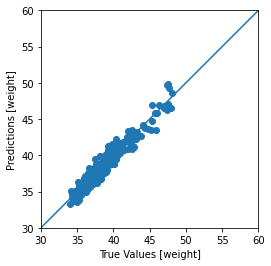

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(weight_pred, test_weight_label)
plt.xlabel('True Values [weight]')
plt.ylabel('Predictions [weight]')
lims = [30, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_weight_label

141     49.664072
178     46.876165
180     46.752680
188     49.893984
207     46.951447
          ...    
2527    34.756029
2528    35.064065
2536    36.279261
2541    34.114205
2547    38.539278
Name: weight, Length: 420, dtype: float64

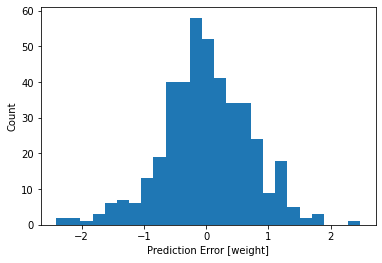

In [ ]:
error = weight_pred.flatten() - test_weight_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [weight]")
_ = plt.ylabel("Count")

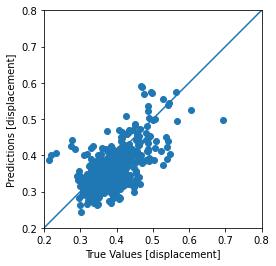

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(displacement_pred, test_displacement_label)
plt.xlabel('True Values [displacement]')
plt.ylabel('Predictions [displacement]')
lims = [0.2, 0.8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

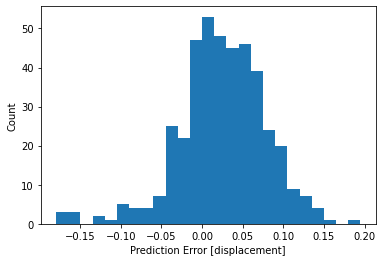

In [ ]:
error = displacement_pred.flatten() - test_displacement_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [displacement]")
_ = plt.ylabel("Count")

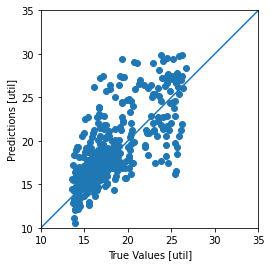

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(util_pred, test_util_label)
plt.xlabel('True Values [util]')
plt.ylabel('Predictions [util]')
lims = [10, 35]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

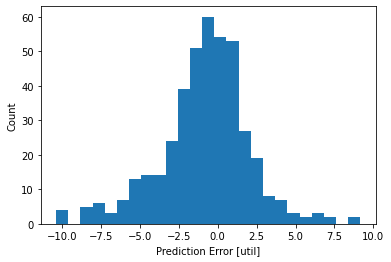

In [ ]:
error = util_pred.flatten() - test_util_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [util]")
_ = plt.ylabel("Count")